# Time Series Analysis: Resampling, Shifting, and Rolling
Useful Operations
- Resampling
- Shifting
- Rolling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
df = pd.read_csv('../data/crypto_daily/crypto-markets.csv', 
                 index_col="date",
                 parse_dates=["date"] #parse "date" col as datetime object
                )

In [3]:
df.head()

,slug,symbol,name,ranknow,open,high,low,close,volume,market,close_ratio,spread
date,,,,,,,,,,,,
2013-04-28,bitcoin,BTC,Bitcoin,1,135.30,135.98,132.10,134.21,0,1500520000,0.5438,3.88
2013-04-29,bitcoin,BTC,Bitcoin,1,134.44,147.49,134.00,144.54,0,1491160000,0.7813,13.49
2013-04-30,bitcoin,BTC,Bitcoin,1,144.00,146.93,134.05,139.00,0,1597780000,0.3843,12.88
2013-05-01,bitcoin,BTC,Bitcoin,1,139.00,139.89,107.72,116.99,0,1542820000,0.2882,32.17
2013-05-02,bitcoin,BTC,Bitcoin,1,116.38,125.60,92.28,105.21,0,1292190000,0.3881,33.32


In [4]:
df.index.dtype #'datetime64[ns]' = '<M8[ns]'

dtype('<M8[ns]')

In [6]:
df = df[df.slug=="litecoin"][["open"]]

In [7]:
df.head()

,open
date,
2013-04-28,4.30
2013-04-29,4.37
2013-04-30,4.40
2013-05-01,4.29
2013-05-02,3.78


## Resampling
- **Resampling** means representing the data with different frequency
    - **down-sampling** convert to lower frequency
    - can be done using 
        - `resample()` aggregates data based on specified freq and aggre function
        - `asfreq()` select data based on specified freq and returns the value at the end of specified interval
- Assume a temp sensor takes measurement every minute, and if we do not need to have minute-level precision, we can take the average of 60 mins measurement


In [ ]:
latest_df = df.iloc[-500:, :]

In [11]:
latest_df.head()

,open
date,
2016-08-29,3.74
2016-08-30,3.77
2016-08-31,3.81
2016-09-01,3.80
2016-09-02,3.84


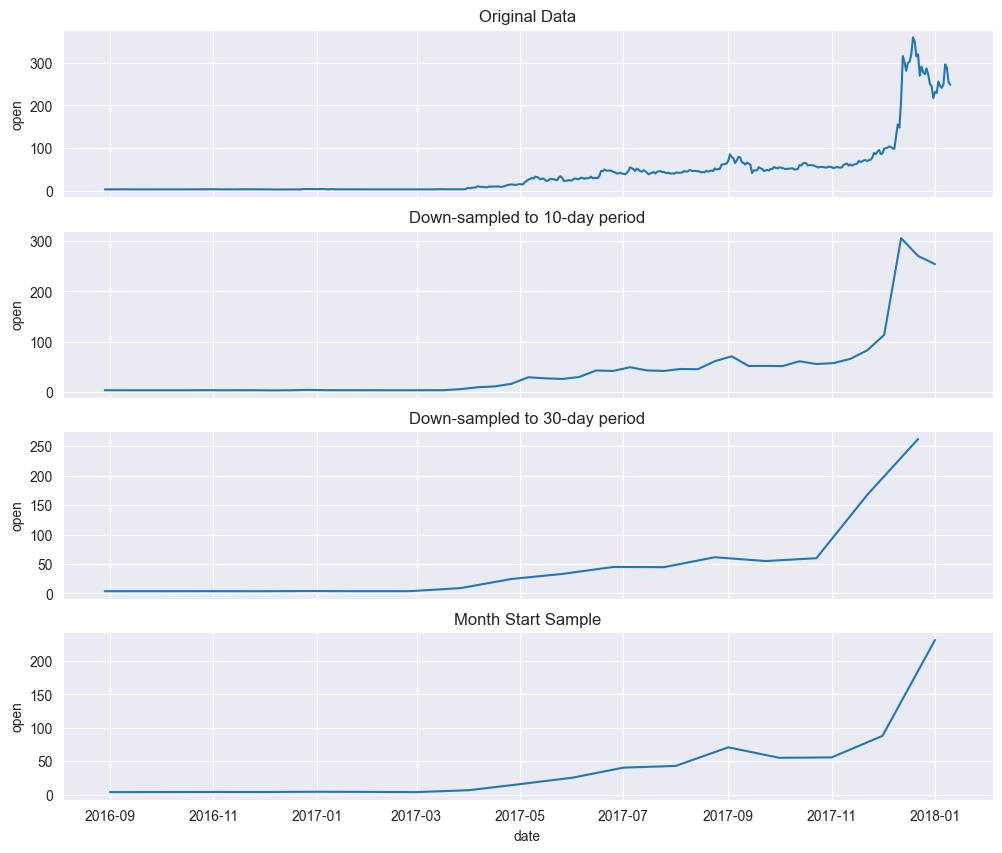

In [9]:

fig, axes = plt.subplots(4,1, sharex=True, figsize=(12,10))

sns.lineplot(data=latest_df, x=latest_df.index, y=latest_df.open, ax=axes[0])
axes[0].set(title="Original Data")

sample_10d = latest_df.resample('10D').mean()
sns.lineplot(data=sample_10d, x=sample_10d.index, y=sample_10d.open, ax=axes[1])
axes[1].set(title="Down-sampled to 10-day period")

sample_30d = latest_df.resample('30D').mean()
sns.lineplot(data=sample_30d, x=sample_30d.index, y=sample_30d.open, ax=axes[2])
axes[2].set(title="Down-sampled to 30-day period")

sample_month_start = latest_df.asfreq("MS")
sns.lineplot(data=sample_month_start, x=sample_month_start.index, y=sample_month_start.open, ax=axes[3])
axes[3].set(title="Month Start Sample")
plt.show()

In [10]:
sample_month_start.head()

,open
date,
2016-09-01,3.80
2016-10-01,3.85
2016-11-01,4.00
2016-12-01,3.91
2017-01-01,4.33


In [11]:
sample_10d.head()

,open
date,
2016-08-29,3.867
2016-09-08,3.886
2016-09-18,3.845
2016-09-28,3.844
2016-10-08,3.847


## Shifting (Lag)
- Time series data analysis require shift data points to make a comparison
    - `shift` shifts the data
    - `tshift` shifts the time index

In [12]:
df.head()

,open
date,
2013-04-28,4.30
2013-04-29,4.37
2013-04-30,4.40
2013-05-01,4.29
2013-05-02,3.78


- create a lag of 2 days, so the entire dataframe is shifted down by 2 days

In [15]:
df.shift(2).head()

,open
date,
2013-04-28,NaN
2013-04-29,NaN
2013-04-30,4.30
2013-05-01,4.37
2013-05-02,4.40


/var/folders/ww/280v33ws1pdd58c895ntxf4w0000gn/T/ipykernel_8531/2063134651.py:7: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  data.tshift(5).plot(ax=axes[2], title="Shifting Index")


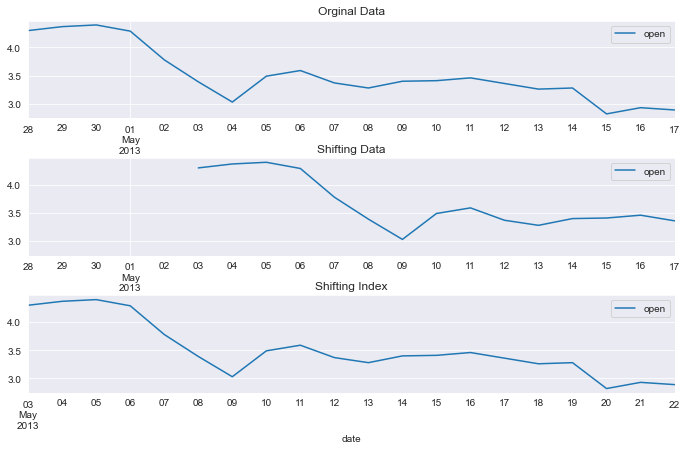

In [ ]:
fig, axes = plt.subplots(nrows=3, figsize=(10, 6), sharey=True)
fig.tight_layout(pad=2)

data = df.iloc[:20, :]
data.plot(ax=axes[0], title="Orginal Data")
data.shift(5).plot(ax=axes[1], title="Shifting Data")
data.tshift(5).plot(ax=axes[2], title="Shifting Index")
plt.show()

## Rolling
- Rolling is a very useful operation for time series data.
- Rolling means creating a rolling window with a specified size and perform calculations on the data in this window which rolls through the data
- For example: `rolling_window = 5`, the first 4 records will be `NaN` and only starting 5th record has value which is the mean of the first 5 records.

In [ ]:
data = df.iloc[:20, :]
data.insert(len(data.columns), 'rolling', data['open'].rolling(5).mean())

In [ ]:
data.head(10)

,open,rolling
date,,
2013-04-28,4.30,NaN
2013-04-29,4.37,NaN
2013-04-30,4.40,NaN
2013-05-01,4.29,NaN
2013-05-02,3.78,4.228
2013-05-03,3.39,4.046
2013-05-04,3.03,3.778
2013-05-05,3.49,3.596
2013-05-06,3.59,3.456
